# SPY VS SDY + Div 
- เปรียบเทียบ S&P และ S&P Dividend

In [99]:
from tvDatafeed import TvDatafeed, Interval
import pandas as pd
import numpy as np

import starfishX as sx

import mplcyberpunk
import matplotlib.pyplot as plt 

%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.style.use("cyberpunk")

In [2]:
tv = TvDatafeed()

you are using nologin method, data you access may be limited


In [148]:
df_sdy = tv.get_hist(symbol='sdy',exchange='AMEX',interval=Interval.in_monthly,n_bars=154)
df_sdy.tail(5)

symbol    open      high     low   close      volume
datetime                                                                   
2022-06-01 20:30:00  AMEX:sdy  127.18  128.1400  113.22  118.69  15988318.0
2022-07-01 20:30:00  AMEX:sdy  118.76  126.8500  116.35  126.56  10324421.0
2022-08-01 20:30:00  AMEX:sdy  126.10  132.7400  123.58  123.70  10583758.0
2022-09-01 20:30:00  AMEX:sdy  123.13  127.5633  111.34  111.50  18303982.0
2022-10-03 20:30:00  AMEX:sdy  112.66  123.6900  110.55  122.99  16361289.0

<AxesSubplot:xlabel='datetime'>

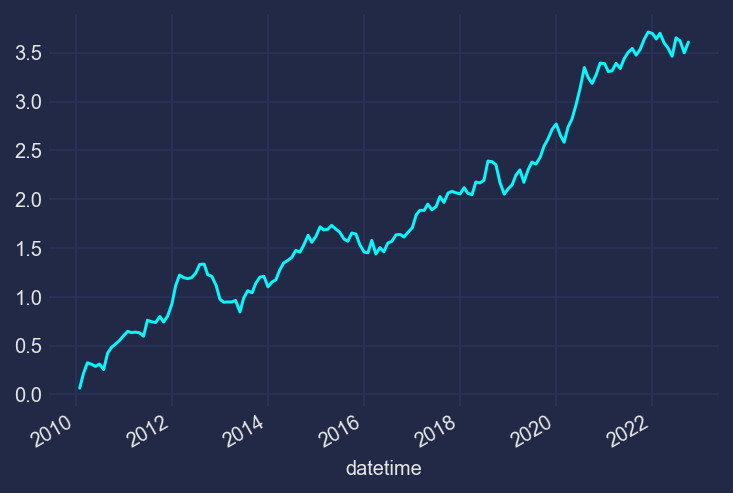

In [149]:
df['close'].pct_change().cumsum().plot()

In [153]:
df_spy = tv.get_hist(symbol='spy',exchange='AMEX',interval=Interval.in_monthly,n_bars=154)
df_spy['close'].pct_change().cumsum().plot()

<AxesSubplot:xlabel='datetime'>

In [154]:
df = df_spy[['close']].copy()
df.columns = ['SPY']

In [155]:
eq = df.index = df_sdy.index
df.loc[eq, 'SDY'] = df_sdy['close']
df

SPY     SDY
datetime                              
2010-01-04 21:30:00  107.39000   45.13
2010-02-01 21:30:00  110.74001   46.94
2010-03-01 21:30:00  117.00000   49.31
2010-04-01 20:30:00  118.81250   50.34
2010-05-03 20:30:00  109.36900   46.92
...                        ...     ...
2022-06-01 20:30:00  377.25000  118.69
2022-07-01 20:30:00  411.99000  126.56
2022-08-01 20:30:00  395.18000  123.70
2022-09-01 20:30:00  357.18000  111.50
2022-10-03 20:30:00  386.21000  122.99

[154 rows x 2 columns]

In [156]:
df.corr()

SPY       SDY
SPY  1.000000  0.975361
SDY  0.975361  1.000000

<AxesSubplot:xlabel='datetime'>

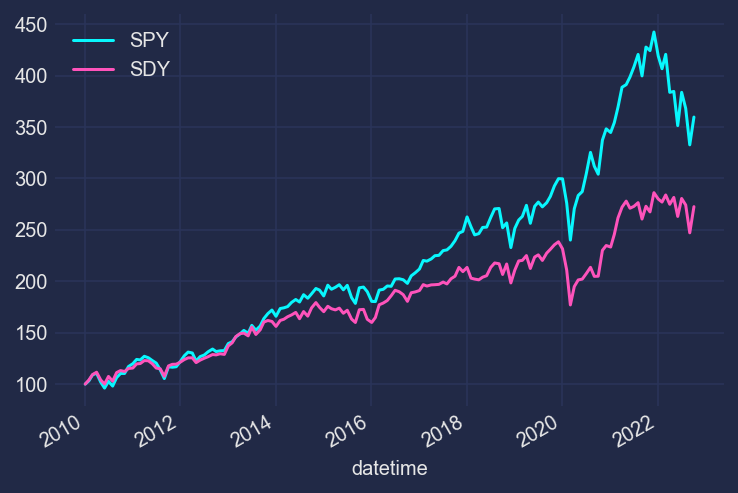

In [157]:
df.rebase(100).plot()

In [158]:
df.head(5)

SPY    SDY
datetime                             
2010-01-04 21:30:00  107.39000  45.13
2010-02-01 21:30:00  110.74001  46.94
2010-03-01 21:30:00  117.00000  49.31
2010-04-01 20:30:00  118.81250  50.34
2010-05-03 20:30:00  109.36900  46.92

In [159]:
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df = df.set_index('Date')
df

SPY     SDY
Date                         
2010-01-04  107.39000   45.13
2010-02-01  110.74001   46.94
2010-03-01  117.00000   49.31
2010-04-01  118.81250   50.34
2010-05-03  109.36900   46.92
...               ...     ...
2022-06-01  377.25000  118.69
2022-07-01  411.99000  126.56
2022-08-01  395.18000  123.70
2022-09-01  357.18000  111.50
2022-10-03  386.21000  122.99

[154 rows x 2 columns]

# ปันผลย้อนหลังของ SDY 10 ปี

In [160]:
div_sdy = pd.read_csv('SDY.csv')
div_sdy['Dividends'].sum()

37.62

In [165]:
div_sdy.Date.head(5) , len(div_sdy)

(0    2010-03-19
 1    2010-06-18
 2    2010-09-17
 3    2010-12-17
 4    2011-03-18
 Name: Date, dtype: object,
 50)

In [166]:
div_sdy.tail(5)

Date  Dividends
45  2021-09-17      0.850
46  2021-12-17      0.970
47  2022-03-18      0.774
48  2022-06-17      0.761
49  2022-09-16      1.541

<AxesSubplot:>

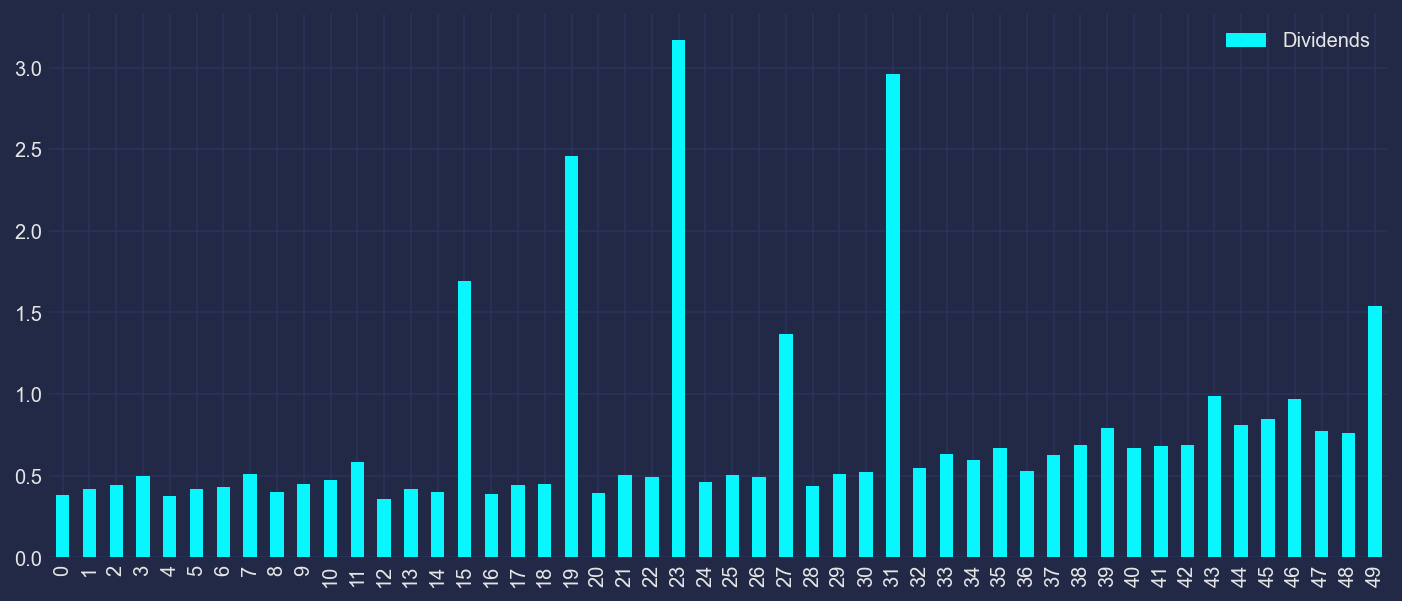

In [185]:
div_sdy.plot(kind='bar',figsize=(12,5))

In [172]:
cnt = 0
div = []
for i in df.index:
  k = 0  
  for j in div_sdy.Date:
    if(i[0:4]==j[0:4] and i[5:7]==j[5:7]):
       #print(i,j,div_sdy.Dividends[cnt])
       k=1
  if(k==0):
    div.append(0)
  else:
    div.append(div_sdy.Dividends[cnt]) 
    cnt+=1   

In [173]:
len(div)

154

In [203]:
k = np.array(div)
np.where(k!=0,1,0).sum()

50

In [218]:
div = np.array(div)
df['div_sdy'] = div*1 #อยากทดสอบเสียภาษี *0.9

In [219]:
df['SDY_DIV_CUM'] = df['div_sdy'].cumsum()

In [220]:
df['SDY_DIV'] = df['SDY'] + df['SDY_DIV_CUM']

In [221]:
df[['SPY','SDY','SDY_DIV']].rebase(100).plot(figsize=(12,5),title='SPY and SDY+Div')

<AxesSubplot:title={'center':'SPY and SDY+Div'}, xlabel='Date'>

In [222]:
df[['SPY','SDY','SDY_DIV']].rebase(100).tail(5)

SPY         SDY     SDY_DIV
Date                                          
2022-06-01  351.289692  262.995790  342.940394
2022-07-01  383.639073  280.434301  360.378905
2022-08-01  367.985846  274.097053  354.041657
2022-09-01  332.600801  247.064037  330.423222
2022-10-03  359.633113  272.523820  355.883005